# importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading dataset

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# checking for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

# no.o f positive vs negative reviews 

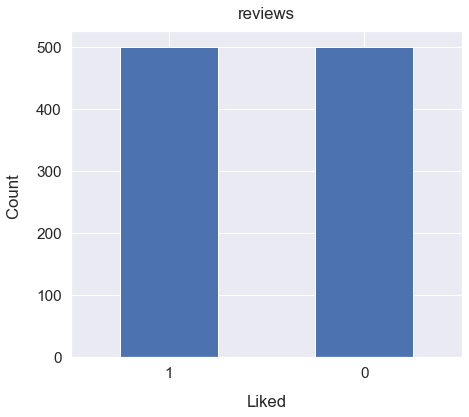

In [6]:
sns.set(font_scale=1.4)
df["Liked"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Liked", labelpad=14)
plt.ylabel("Count ", labelpad=14)
plt.title("reviews", y=1.02);

# remvoing words that dont carry value lik [ 'is','i','are', 'we' ..........]

In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 

In [8]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";",":",  "!",'"'))
    return final


df['Review'] = df['Review'].apply(remove_punctuation)

nltk.download('stopwords')
stop_words = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# using wordcloud to see the words that has most impact on our data

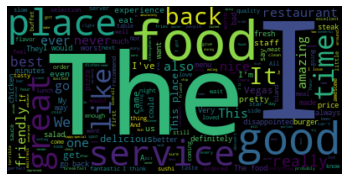

In [9]:
# Create stopword list:
stopwords = set()
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [10]:
positive = df[df['Liked'] == 1]
negative = df[df['Liked'] == 0]

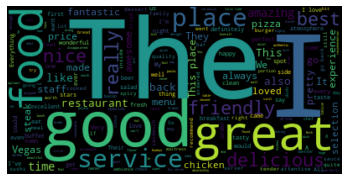

In [11]:
stopwords = set()
stopwords.update(["br", "href"]) 

pos = " ".join(review for review in positive.Review)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

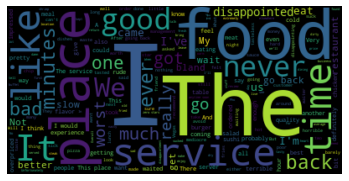

In [33]:
stopwords = set()
stopwords.update(["br", "href"]) 
neg = " ".join(review for review in negative.Review)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")

plt.show()

# creating bag of words using cont vectorizer


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()


In [14]:
X=df['Review']
y=df['Liked']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [16]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# 1. SVM without pipeline

In [17]:
from sklearn.svm import SVC

In [18]:
svc=SVC()

In [19]:
svc.fit(X_train,y_train)

SVC()

In [20]:
svc.score(X_test,y_test)

0.8

In [21]:
y_pred=svc.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

cf=confusion_matrix(y_test,y_pred)
cf

array([[115,  19],
       [ 31,  85]], dtype=int64)

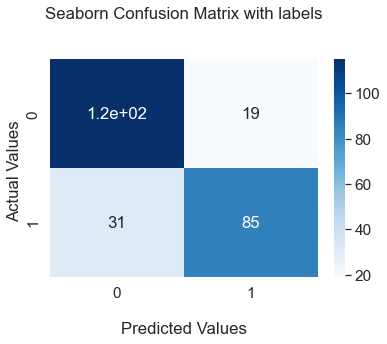

In [23]:
import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 1. multinomial  NB without pipeline

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mb=MultinomialNB()

In [26]:
mb.fit(X_train,y_train)

MultinomialNB()

In [27]:
y_pred=mb.predict(X_test)

In [28]:
mb.score(X_test,y_test)

0.74

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

cf=confusion_matrix(y_test,y_pred)
cf

array([[95, 39],
       [26, 90]], dtype=int64)

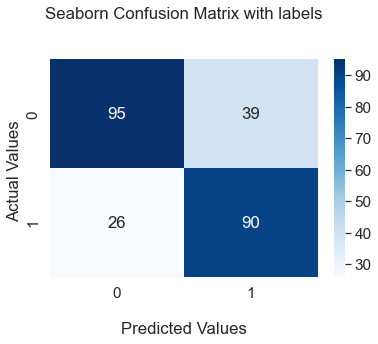

In [30]:
import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [37]:
mb.predict(vectorizer.transform(['Would not go back']))

array([0], dtype=int64)